# Example: Krige a map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import geostats

# Input

### Set an arbitrary study zone and earthquake epicenter

In [2]:
lat_min = 36.5
lat_max = 37.5
lon_min = -122.5
lon_max = -121.5
epi_lat = (lat_max+lat_min)/2
epi_lon = (lon_max+lon_min)/2

### Sampled locations

In [3]:
N_samp   = 25
samp_lat = np.random.uniform(lat_min,lat_max,N_samp)
samp_lon = np.random.uniform(lon_min,lon_max,N_samp)
samp_val = np.random.normal(0,1,N_samp)

### Unsampled locations

In [4]:
N_samp   = 50
grid_lat = np.linspace(lat_min,lat_max,N_samp)
grid_lon = np.linspace(lon_min,lon_max,N_samp)

### Correlation structure

In [5]:
L_E     = 100
gamma_E = 1
L_A     = 25
sill    = 0.25

In [6]:
Mrho_sam = geostats.MrhoEA_sam2sam_cy(samp_lat,samp_lon,epi_lat,epi_lon,L_E,gamma_E,L_A)
Mrho_uns = geostats.MrhoEA_sam2grid_cy(samp_lat,samp_lon,epi_lat,epi_lon,grid_lat,grid_lon,L_E,gamma_E,L_A)

# Kriging

In [7]:
sampled   = geostats.Site(samp_lat,samp_lon,value=samp_val)
unsampled = geostats.Site(grid_lat,grid_lon)

In [8]:
Kriger = geostats.Kriging(sampled,unsampled,sill,None,epi_lat,epi_lon,Mrho_sam,Mrho_uns)
out    = Kriger.Krige('ordinary')

In [9]:
K_mean = out.mean
K_var  = out.variance

# Plotting

### Plot the mean Kriged values

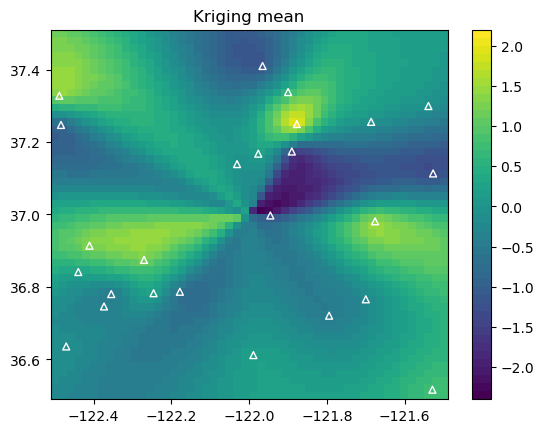

In [10]:
cmap    = plt.get_cmap('viridis')
val_min = min(samp_val.min(),K_mean.min())
val_max = max(samp_val.max(),K_mean.max())
levels  = MaxNLocator(50).tick_values(val_min,val_max)
norm    = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

m = plt.pcolormesh(grid_lon,grid_lat,K_mean.reshape(N_samp,N_samp).T,cmap=cmap,norm=norm)
plt.scatter(samp_lon,samp_lat,c=samp_val,s=25,cmap=cmap,norm=norm,marker='^',edgecolor='w')
cbar = plt.colorbar(m)
plt.title('Kriging mean');

### Plot the Kriging variance

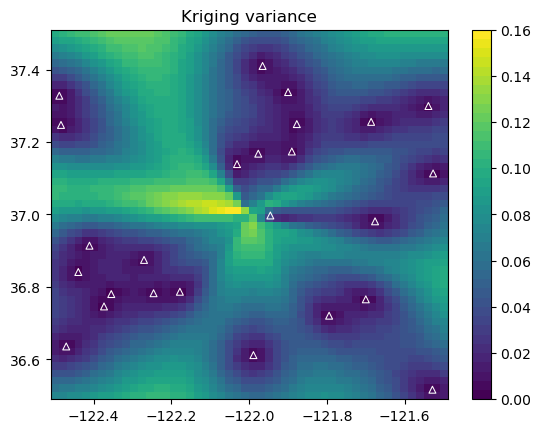

In [11]:
levels  = MaxNLocator(50).tick_values(K_var.min(),K_var.max())
norm    = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

m = plt.pcolormesh(grid_lon,grid_lat,K_var.reshape(N_samp,N_samp).T,cmap=cmap,norm=norm)
plt.scatter(samp_lon,samp_lat,facecolor='none',edgecolor='w',s=25,marker='^',linewidth=0.75)
cbar = plt.colorbar(m)
plt.title('Kriging variance');